<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Python 📊 Data Science - Project
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Bitcoin Trading 🤖 Bot.
       </h2>
</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests, json

<div id="pandas">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Using Pandas
        </h3>
</div>

<span style="color:grey; font-size:1.2em">We will scavenge Bitcoin data on the site <b>https://www.investing.com</b></span>

In [2]:
url = 'https://www.investing.com/crypto/bitcoin/historical-data'

<span style="color:grey; font-size:1.2em">In order to retrieve data, we need to specify a false value for <b>headers<b/></span>

In [3]:

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}



<span style="color:grey; font-size:1.2em">The read_html() function transforms HTML arrays into a list of DataFrame objects</span>

In [4]:
r = requests.get(url, headers=header)

In [5]:
data = yf.Ticker("BTC-USD")
yf_df = data.history(start='2014-09-01', end='2022-12-1')

In [6]:
yf_df

Open          High           Low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2022-11-26 00:00:00+00:00  16521.576172  16666.863281  16416.228516   
2022-11-27 00:00:00+00:00  16463.882812  16594.406250  16437.025391   
2022-11-28 00:00:00+00:00  16440.222656  16482.933594  16054.530273   
2022-11-29 00:00:00+00:00  16217.639648  16522.257812  16139.396484   
2022-11-30 00:00:00+00:00  16445.476562  17190.937500  16445.476562   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2014-09-17 00:00:00+00:00    457.334015     21056800          0             0  
2014-09-18 00:00:00+00:00    424.440002     34483200          0             0  
2014-09-19 00:00:00+00:00    394.795990     37919700          0             0  
2014-09-20 00:00:00+00:00    408.903992     36863600          0             0  
2014-09-21 00:00:00+00:00    398.821014     26580100          0             0  
...                                 ...          ...        ...           ...  
2022-11-26 00:00:00+00:00  16464.281250  18000008764          0             0  
2022-11-27 00:00:00+00:00  16444.626953  20443898509          0             0  
2022-11-28 00:00:00+00:00  16217.322266  27743025156          0             0  
2022-11-29 00:00:00+00:00  16444.982422  23581685468          0             0  
2022-11-30 00:00:00+00:00  17168.566406  29523576583          0             0  

[2997 rows x 7 columns]

In [7]:
api_data = json.loads(requests.get('https://coincodex.com/api/coincodexcoins/get_historical_data_by_slug/bitcoin/2021-1-1/2021-9-30/1?t=5459791').text)
api_df = pd.DataFrame(api_data['data'])

In [8]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Bitcoin data set
BTC_data = pd.read_csv("BTC-USD.csv")

In [10]:
BTC_data.head()

Date          Open          High           Low         Close  \
0  2021-12-13  50114.742188  50205.000000  45894.847656  46737.480469   
1  2021-12-14  46709.824219  48431.398438  46424.496094  46612.632813   
2  2021-12-15  48379.753906  49473.957031  46671.964844  48896.722656   
3  2021-12-16  48900.464844  49425.574219  47529.878906  47665.425781   
4  2021-12-17  47653.730469  48004.894531  45618.214844  46202.144531   

      Adj Close       Volume  
0  46737.480469  32166727776  
1  46612.632813  34638619079  
2  48896.722656  36541828520  
3  47665.425781  27268150947  
4  46202.144531  32902725329

In [11]:
BTC_data.tail()

Date          Open          High           Low         Close  \
361  2022-12-09  17232.148438  17280.546875  17100.835938  17133.152344   
362  2022-12-10  17134.220703  17216.826172  17120.683594  17128.724609   
363  2022-12-11  17129.710938  17245.634766  17091.820313  17104.193359   
364  2022-12-12  17102.500000  17212.564453  16899.394531  17206.437500   
365  2022-12-13  17220.197266  17423.921875  17114.375000  17400.626953   

        Adj Close       Volume  
361  17133.152344  20328426366  
362  17128.724609  12706781969  
363  17104.193359  14122486832  
364  17206.437500  19617581341  
365  17400.626953  20311791616

In [12]:
BTC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [13]:
BTC_data.describe()

Open          High           Low         Close     Adj Close  \
count    366.000000    366.000000    366.000000    366.000000    366.000000   
mean   29886.622753  30469.177964  29177.015097  29792.557980  29792.557980   
std    10797.668247  11014.070808  10546.454547  10756.715026  10756.715026   
min    15782.300781  16253.047852  15599.046875  15787.284180  15787.284180   
25%    20096.255371  20380.781738  19641.104492  20061.287110  20061.287110   
50%    25583.317383  25965.589844  24276.187500  24413.443359  24413.443359   
75%    40440.760742  41230.783203  39367.844727  40350.159180  40350.159180   
max    50854.917969  51956.328125  50514.496094  50822.195313  50822.195313   

             Volume  
count  3.660000e+02  
mean   3.060002e+10  
std    1.221723e+10  
min    1.270678e+10  
25%    2.347578e+10  
50%    2.860227e+10  
75%    3.455030e+10  
max    1.189925e+11

In [14]:
print(f"The number of empty cells in our dataset is :\n{BTC_data.isna().sum()}")

The number of empty cells in our dataset is :
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [15]:
BTC_Data = BTC_data.set_index('Date', drop=True)

In [16]:
BTC_Data = BTC_Data[BTC_Data.index>='2020-01-01']

In [17]:
BTC_Data.head()

Open          High           Low         Close  \
Date                                                                 
2021-12-13  50114.742188  50205.000000  45894.847656  46737.480469   
2021-12-14  46709.824219  48431.398438  46424.496094  46612.632813   
2021-12-15  48379.753906  49473.957031  46671.964844  48896.722656   
2021-12-16  48900.464844  49425.574219  47529.878906  47665.425781   
2021-12-17  47653.730469  48004.894531  45618.214844  46202.144531   

               Adj Close       Volume  
Date                                   
2021-12-13  46737.480469  32166727776  
2021-12-14  46612.632813  34638619079  
2021-12-15  48896.722656  36541828520  
2021-12-16  47665.425781  27268150947  
2021-12-17  46202.144531  32902725329

In [18]:
BTC_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2021-12-13 to 2022-12-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0+ KB


In [19]:
BTC_Data.describe()

Open          High           Low         Close     Adj Close  \
count    366.000000    366.000000    366.000000    366.000000    366.000000   
mean   29886.622753  30469.177964  29177.015097  29792.557980  29792.557980   
std    10797.668247  11014.070808  10546.454547  10756.715026  10756.715026   
min    15782.300781  16253.047852  15599.046875  15787.284180  15787.284180   
25%    20096.255371  20380.781738  19641.104492  20061.287110  20061.287110   
50%    25583.317383  25965.589844  24276.187500  24413.443359  24413.443359   
75%    40440.760742  41230.783203  39367.844727  40350.159180  40350.159180   
max    50854.917969  51956.328125  50514.496094  50822.195313  50822.195313   

             Volume  
count  3.660000e+02  
mean   3.060002e+10  
std    1.221723e+10  
min    1.270678e+10  
25%    2.347578e+10  
50%    2.860227e+10  
75%    3.455030e+10  
max    1.189925e+11

In [20]:
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

In [21]:
btc_trace = go.Figure(data=[go.Scatter(x=BTC_Data.index, y=BTC_Data['Close'], name= 'Close')])

btc_trace.update_layout(
title = {
    'text': 'btc_trace for Close Value',
    'y':0.90,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'} , 
template="plotly_white")

btc_trace.show()

In [22]:
# view the "Volume" value

btc_trace = go.Figure(data=[go.Scatter(x=BTC_Data.index, y=BTC_Data['Volume'], name= 'Volume')])

btc_trace.update_layout(
title = {
    'text': 'btc_trace for Volume Value',
    'y':0.90,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'} , 
template="plotly_white")

btc_trace.show()

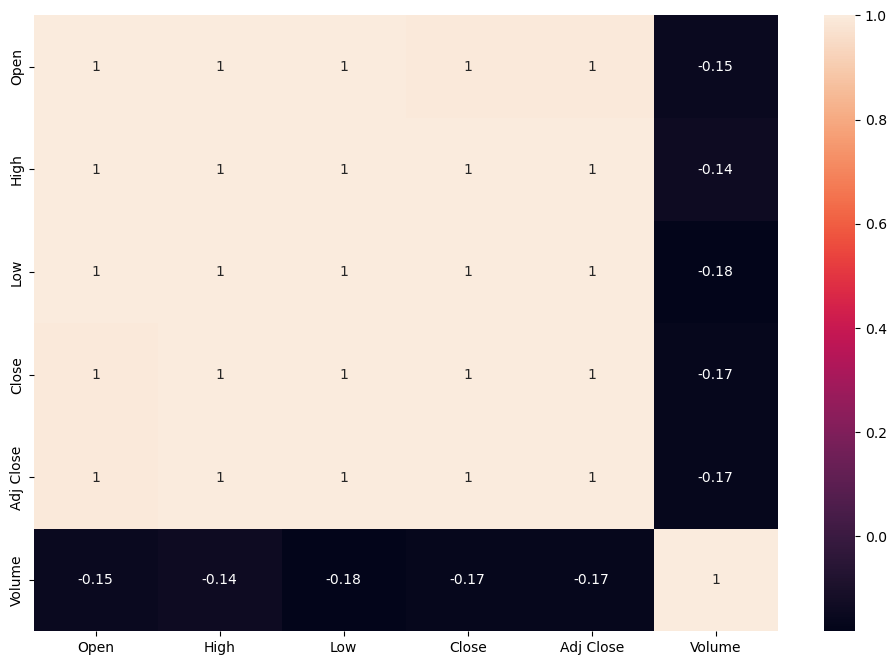

In [23]:
# the correlation matrix 
mat = BTC_Data.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(mat,annot=True)

plt.show()

In [24]:
def candelstick_chart(data,title):
    candlestick = go.Figure(data = [go.Candlestick(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')],
                                               #increasing_line_color= 'cyan', 
                                               #decreasing_line_color= 'gray'
                                                )])
    candlestick.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    candlestick.update_layout(
    title = {
        'text': '{:} Candelstick Chart'.format(title),
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'} , 
    template="plotly_white")

    candlestick.update_yaxes(title_text = 'Prix en USD', ticksuffix = '$')
    return candlestick

In [25]:
btc_plot = candelstick_chart(BTC_Data[-90:],title = "Bitcoin(BTC)")
btc_plot.show()

In [26]:
def ohlc_chart(data,title):
    ohlc = go.Figure(data = [go.Ohlc(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')])])
    ohlc.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    ohlc.update_layout(
    title = {
        'text': '{:} OHLC Chart'.format(title),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

    ohlc.update_yaxes(title_text = 'Prix in USD', ticksuffix = '$')
    return ohlc

In [27]:
ohlc_chart(BTC_Data[:-200], title = "Bitcoin")

In [28]:
def vol_traded(data ,title,color):
    area = px.area(data_frame=data,
               x = data.index ,
               y = "Volume",
               markers = True)
    area.update_traces(line_color=color)
    area.update_xaxes(
        title_text = 'Time',
        rangeslider_visible = True)
    area.update_yaxes(title_text = 'Number of trades every minute')
    area.update_layout(showlegend = True, xaxis_rangeslider_visible=False,
        title = {
            'text': '{:} Volume Traded'.format(title),
            'y':0.94,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        template="plotly_white")
    return area

In [29]:
vol_traded(BTC_Data[-90:], "Bitcoin",color = "blue")

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
closedf = BTC_data[['Date','Close']]
print("shapen of close dataframe", closedf.shape)

shapen of close dataframe (366, 2)


In [32]:
closedf = closedf[closedf['Date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  366


<span style="color:grey; font-size:1.2em">Normalizing close price value.</span>

In [33]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(366, 1)



<span style="color:grey; font-size:1.2em">  Now we will split our dataset <b>70%</b> for training and <b>30%</b> for testing.</span>

In [34]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]

In [35]:
print("The train data size is: ",train_data.shape[0])
print("the test data size is: ",test_data.shape[0])

The train data size is:  256
the test data size is:  110


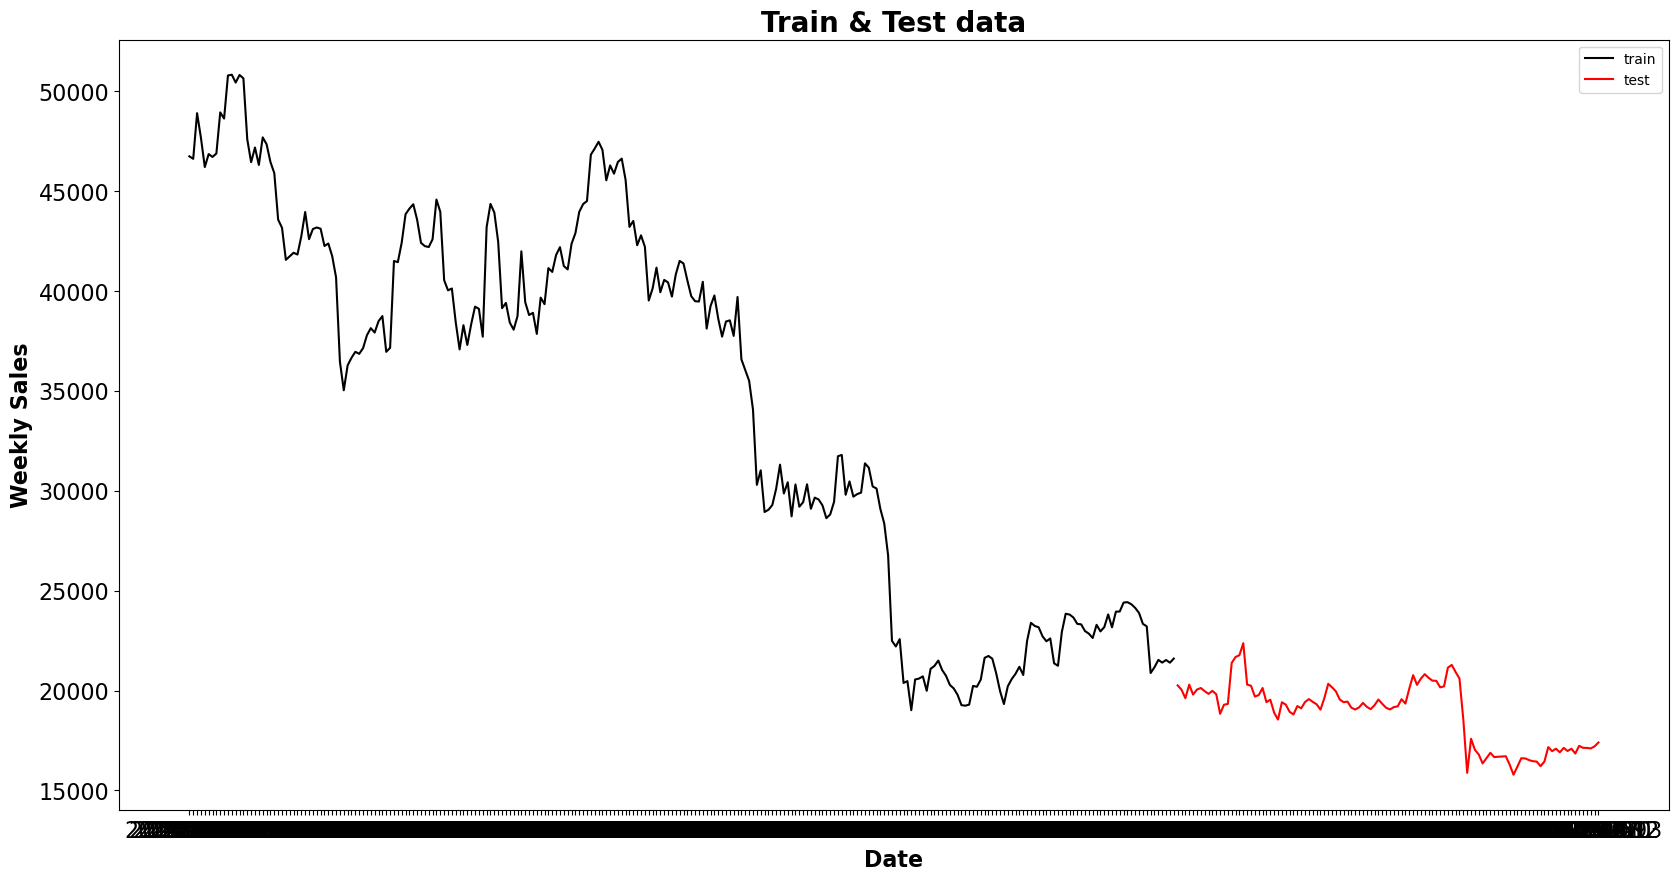

In [36]:

fig, ax = plt.subplots(figsize=(20, 10))
sb.lineplot(x = close_stock['Date'][:train_data.shape[0]], y = close_stock['Close'][:train_data.shape[0]], color = 'black')
sb.lineplot(x = close_stock['Date'][train_data.shape[0]:], y = close_stock['Close'][train_data.shape[0]:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))


<span style="color:grey; font-size:1.2em">Convert an array of values to a dataset matrix.</span>

In [37]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [38]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (240, 15)
y_train:  (240,)
X_test:  (94, 15)
y_test (94,)


<div id="pre-processing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Model building
        </h3>
</div>

In [39]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 


<span style="color:grey; font-size:1.2em">We will choose a set of templates to start with</span>  


In [40]:
LR=LinearRegression()

XGBoost = XGBRegressor(n_estimators=100, learning_rate=0.3,
                     max_delta_step=0, max_depth=6, n_jobs=4,
                     num_parallel_tree=1, random_state=0)

RFR = RandomForestRegressor(max_depth=1000)
models = {"Linear Regression":LR, "XGBoost Regressor":XGBoost, "Random Forest Regressor":RFR}

In [41]:
def train_model(model_name):
    models[model_name].fit(X_train,y_train)
    predictions = models[model_name].predict(X_test)
    print("\n---------------"+model+"---------------\n")
    print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
    print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions)))+"\n")
    

In [42]:
for model in models:
    train_model(model)


---------------Linear Regression---------------

Mean Absolute Error - MAE : 0.01071422898135681
Root Mean squared Error - RMSE : 0.016378169482469986


---------------XGBoost Regressor---------------

Mean Absolute Error - MAE : 0.05332647168900897
Root Mean squared Error - RMSE : 0.06641369988016972


---------------Random Forest Regressor---------------

Mean Absolute Error - MAE : 0.04763741001925408
Root Mean squared Error - RMSE : 0.061324158460691613



In [43]:
def predict(model_name):
    train_predict=models[model_name].predict(X_train)
    test_predict=models[model_name].predict(X_test)

    # Transform back to original form
    train_predict = train_predict.reshape(-1,1)
    test_predict = test_predict.reshape(-1,1)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    
    return train_predict, test_predict

<div id="model-building">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Model evaluation
        </h3>
</div>

<span style="color:grey; font-size:1.2em">We will evaluate our models on both training and test data and obtain accuracy scores.</span>

In [44]:
from itertools import cycle

In [45]:
def eval(model):
    train_predict, test_predict = predict(model)
    # shift train predictions for plotting
    look_back=time_step
    trainPredictPlot = np.empty_like(closedf)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(closedf)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
    
    original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
    original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
    

    
    names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

    plotdf = pd.DataFrame({'date': close_stock['Date'],
                           'original_close': close_stock['Close'],
                          'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                          'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

    fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                              plotdf['test_predicted_close']],
                  labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='Prediction with '+model,
                      plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
    
    ## Variance Regression Score
    print("\n\nTrain data explained variance regression score:", 
          explained_variance_score(original_ytrain, train_predict))
    print("Test data explained variance regression score:", 
          explained_variance_score(original_ytest, test_predict))

    ## R square score for regression
    print("\nTrain data R2 score:", r2_score(original_ytrain, train_predict))
    print("Test data R2 score:", r2_score(original_ytest, test_predict))
    


In [46]:
for model in models:
    eval(model) 
    



Train data explained variance regression score: 0.9839599410446931
Test data explained variance regression score: 0.8762140588842445

Train data R2 score: 0.9839599410446931
Test data R2 score: 0.8747390315483453




Train data explained variance regression score: 0.9999892615269546
Test data explained variance regression score: 0.12891461020862716

Train data R2 score: 0.9999892615269512
Test data R2 score: -1.0596830715207064




Train data explained variance regression score: 0.9972423012231896
Test data explained variance regression score: 0.17784929789821569

Train data R2 score: 0.9972411880702324
Test data R2 score: -0.7560959352366743


<span style="color:grey; font-size:1.2em">As we seen above, the basic ml approaches get respectable results, but we only got a model that performs very well on all data.</span>

<center id="deep-learning">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Approach with Deep Learning 🧠
        </h2>
</center>

<div id="pre-processing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Pre-treatment
        </h3>
</div>

<span style="color:grey; font-size:1.2em">"Reshape" the input so that it is <b>[samples, time steps, features]</b> , what is required for LSTM.</span>  


In [47]:
# reshape input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (240, 15, 1)
X_test:  (94, 15, 1)


<div id="LSTM">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  LSTM
        </h3>
</div>

<span style="color:grey; font-size:1.2em">After applying the linear regression model to our data, we will try to implement a deep learning model: LSTM which is very suitable for this case.</span>

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

<span style="color:grey; font-size:1.2em">Now we create a new `Sequential()` model then we add<b> 2 layers:</b> <br> one layer with activation <b>relu</b> with 10 units and the second with one unit.</span>

In [49]:
LSTM_model=Sequential()

LSTM_model.add(LSTM(10,input_shape=(None,1),activation="relu"))

LSTM_model.add(Dense(1))

<span style="color:grey; font-size:1.2em">We choose the parameters of the `compile()` method. <br>for the parameter <b>loss</b> is <i>mean_squared_error</i> in order to calculate the cross-entropy loss between the two "Labels" and the predictions. For <b>optimizer</b> we choose: <i>adam</i> and of course <i>accuracy</i> as <b>metrics</b> </span>

In [50]:
LSTM_model.compile(loss="mean_squared_error",optimizer="adam")

<span style="color:grey; font-size:1.2em">Let's see a <b>summary<b> of the parameters of our model</span>

In [51]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = LSTM_model.fit( X_train, y_train,
                         validation_data=(X_test,y_test),
                         epochs=100, batch_size=32,
                         verbose=True)

Epoch 1/100
8/8 [==============================] - 2s 49ms/step - loss: 0.2303 - val_loss: 0.0034
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.1847 - val_loss: 0.0016
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 0.1432 - val_loss: 0.0018
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.1007 - val_loss: 0.0045
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0590 - val_loss: 0.0101
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0295 - val_loss: 0.0186
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0132 - val_loss: 0.0273
Epoch 8/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0102 - val_loss: 0.0264
Epoch 9/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0089 - val_loss: 0.0179
Epoch 10/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0075 - val_loss: 0.0121
Epoch 11/100
8/8 [=

8/8 [==============================] - 0s 23ms/step - loss: 0.0031 - val_loss: 8.9636e-04
Epoch 84/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0030 - val_loss: 9.4990e-04
Epoch 85/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0030 - val_loss: 8.6820e-04
Epoch 86/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0030 - val_loss: 8.3316e-04
Epoch 87/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0031 - val_loss: 8.6580e-04
Epoch 88/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0030 - val_loss: 8.1881e-04
Epoch 89/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0030 - val_loss: 9.2788e-04
Epoch 90/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0029 - val_loss: 7.6818e-04
Epoch 91/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0030 - val_loss: 8.1969e-04
Epoch 92/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0029 - val_

In [53]:
predictions = LSTM_model.predict(X_test)
print("\n---------------LSTM---------------\n")
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions)))+"\n")

3/3 [==============================] - 0s 4ms/step

---------------LSTM---------------

Mean Absolute Error - MAE : 0.019997565770610525
Root Mean squared Error - RMSE : 0.027310735234972627



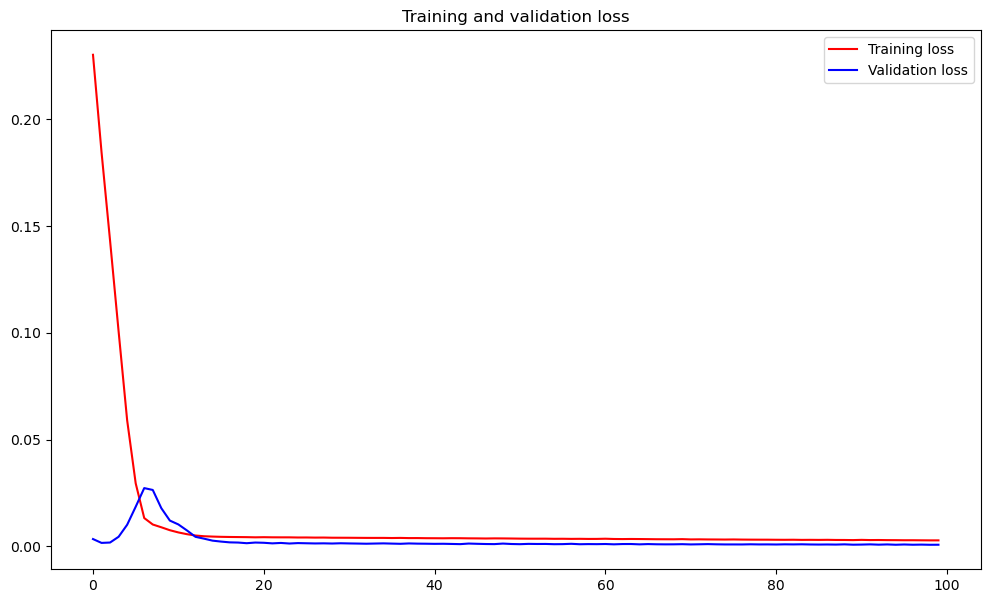

In [54]:
# Plotting Loss vs Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(12, 7))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

<span style="color:grey; font-size:1.2em">Let's make the prediction to verify the performance metrics.</span>

In [55]:
train_predict=LSTM_model.predict(X_train)
test_predict=LSTM_model.predict(X_test)
train_predict.shape, test_predict.shape

# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

3/3 [==============================] - 0s 8ms/step


<div id="eval">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Evaluation
        </h3>
</div>

<span style="color:grey; font-size:1.2em">It's time to evaluate our model on both training and test data and get accuracy scores.</span>

In [56]:
## Variance Regression Score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9590752028972858
Test data explained variance regression score: 0.7184384788892444


In [57]:
## R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9589661656853418
Test data R2 score: 0.6517013698727425


In [58]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Prediction with LSTM',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<span style="color:grey; font-size:1.2em">As we can see, we achieved a better score with an artificial neural network for our test data which comes from different sources</span>

<center id="model-eval">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Approach with time series 📈
        </h2>
</center>

<div id="decomposition">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Decomposition
        </h3>
</div>

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning

warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [60]:
tickerSymbol = 'BTC-USD'
data = yf.Ticker(tickerSymbol)

In [61]:
prices = data.history(start='2020-01-01', end='2022-01-31').Close
returns = prices.pct_change().dropna()

In [62]:
returns

Date
2020-01-02 00:00:00+00:00   -0.029819
2020-01-03 00:00:00+00:00    0.051452
2020-01-04 00:00:00+00:00    0.008955
2020-01-05 00:00:00+00:00    0.000089
2020-01-06 00:00:00+00:00    0.048291
                               ...   
2022-01-26 00:00:00+00:00   -0.002757
2022-01-27 00:00:00+00:00    0.007764
2022-01-28 00:00:00+00:00    0.017397
2022-01-29 00:00:00+00:00    0.009365
2022-01-30 00:00:00+00:00   -0.005784
Name: Close, Length: 760, dtype: float64

#### Visualisation

<span style="color:grey; font-size:1.2em">What does my time series look like? ?</span>

In [63]:
fig = px.line(prices)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Price',
                   plot_bgcolor='white')

fig.show()

In [64]:

fig = px.line(returns)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Returns',
                   plot_bgcolor='white')

fig.show()

#### Transformation

<span style="color:grey; font-size:1.2em">When a time series has exponential growth, it usually makes sense to use the logarithm to make the plot more linear.</span>

In [65]:
log_df = np.log(prices) #log df

fig = px.line(log_df, x=log_df.index, y="Close")

fig.update_layout(title='BTC/USD Log Price Representation',
                   xaxis_title='Years',
                   yaxis_title='LOG Price',
                   plot_bgcolor='white')

fig.show()

#### Stationarisation

<span style="color:grey; font-size:1.2em">Time series models work best with stationary series !
<b>Let's try to differentiate the linearized version from the time series.</b>
<br>
&emsp;&emsp;👉 A stationary time series is a series whose properties do not depend on when the series is observed.</span>

Text(0.5, 1.0, '2nd order differentiation')

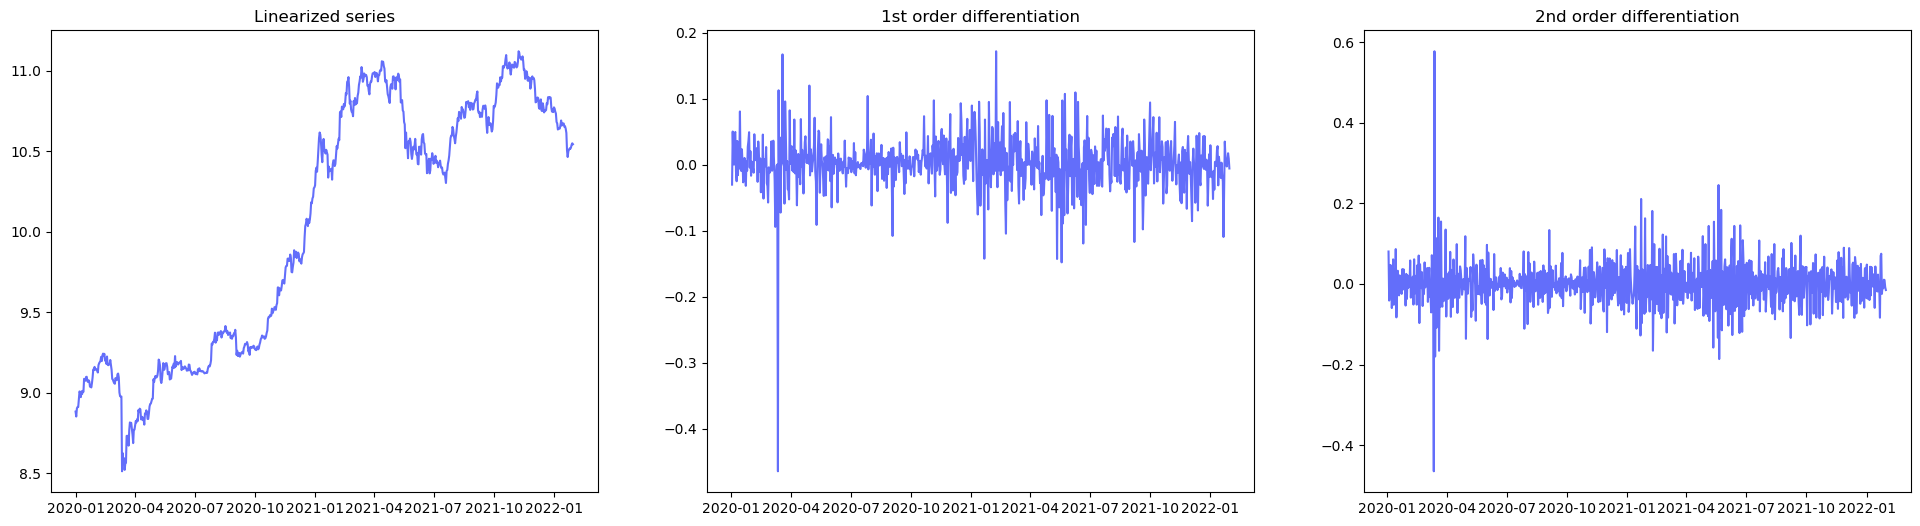

In [66]:
# Let's make the difference and look at the ACF
fig, axes = plt.subplots(1, 3,figsize=(24,6))

plt.style.use('seaborn-deep')

axes[0].plot(log_df, color="#636EFA");
axes[0].set_title('Linearized series')
             
# 1st differenciation
y_diff = log_df.diff().dropna()
axes[1].plot(y_diff, color="#636EFA");
axes[1].set_title('1st order differentiation')

# 2nd differenciation
y_diff_diff = log_df.diff().diff().dropna()
axes[2].plot(y_diff_diff, color="#636EFA");
axes[2].set_title('2nd order differentiation')

<span style="color:grey; font-size:1.2em">👉 Check stationarity using the Augmented Dickey-Fuller test :
<br>
     &emsp;&emsp;❌Null hypothesis: Stationarity <b>does not exist</b> in the series.
<br>
      &emsp;&emsp; ❗  Alternative hypothesis: stationarity <b>exists</b> in the series.
</span>

In [67]:
from statsmodels.tsa.stattools import adfuller

In [68]:
adfuller(log_df)

(-1.275833604342901,
 0.6401546847522432,
 4,
 756,
 {'1%': -3.439029421541435,
  '5%': -2.8653706489231876,
  '10%': -2.568809835460933},
 -2635.294943379781)

In [69]:
# check with ADF Test for stationarity

y_diff= log_df.diff().dropna()
y_diff_diff= log_df.diff().diff().dropna()

print('p-value zero-diff: ', adfuller(log_df)[1])
print('p-value first-diff: ', adfuller(y_diff)[1])
print('p-value second-diff: ', adfuller(y_diff_diff)[1])

p-value zero-diff:  0.6401546847522432
p-value first-diff:  1.6609887029030124e-23
p-value second-diff:  1.3212980331034438e-18


**Remark:**
- A p-value (<0.05) suggests strong evidence against H0, so you **reject the null hypothesis**. 👉 Stationary
- A p-value (>0.05) indicates weak evidence against H0, so you **fail to reject the null hypothesis**. 👉 Non Stationary

<div id="forcasting">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Forecast
        </h3>
</div>

#### ARIMA :
An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series datato either better understand the data set or to predict future trends.

<span style="color:grey; font-size:1.2em">Let's find the hyperparameters p and q</span>

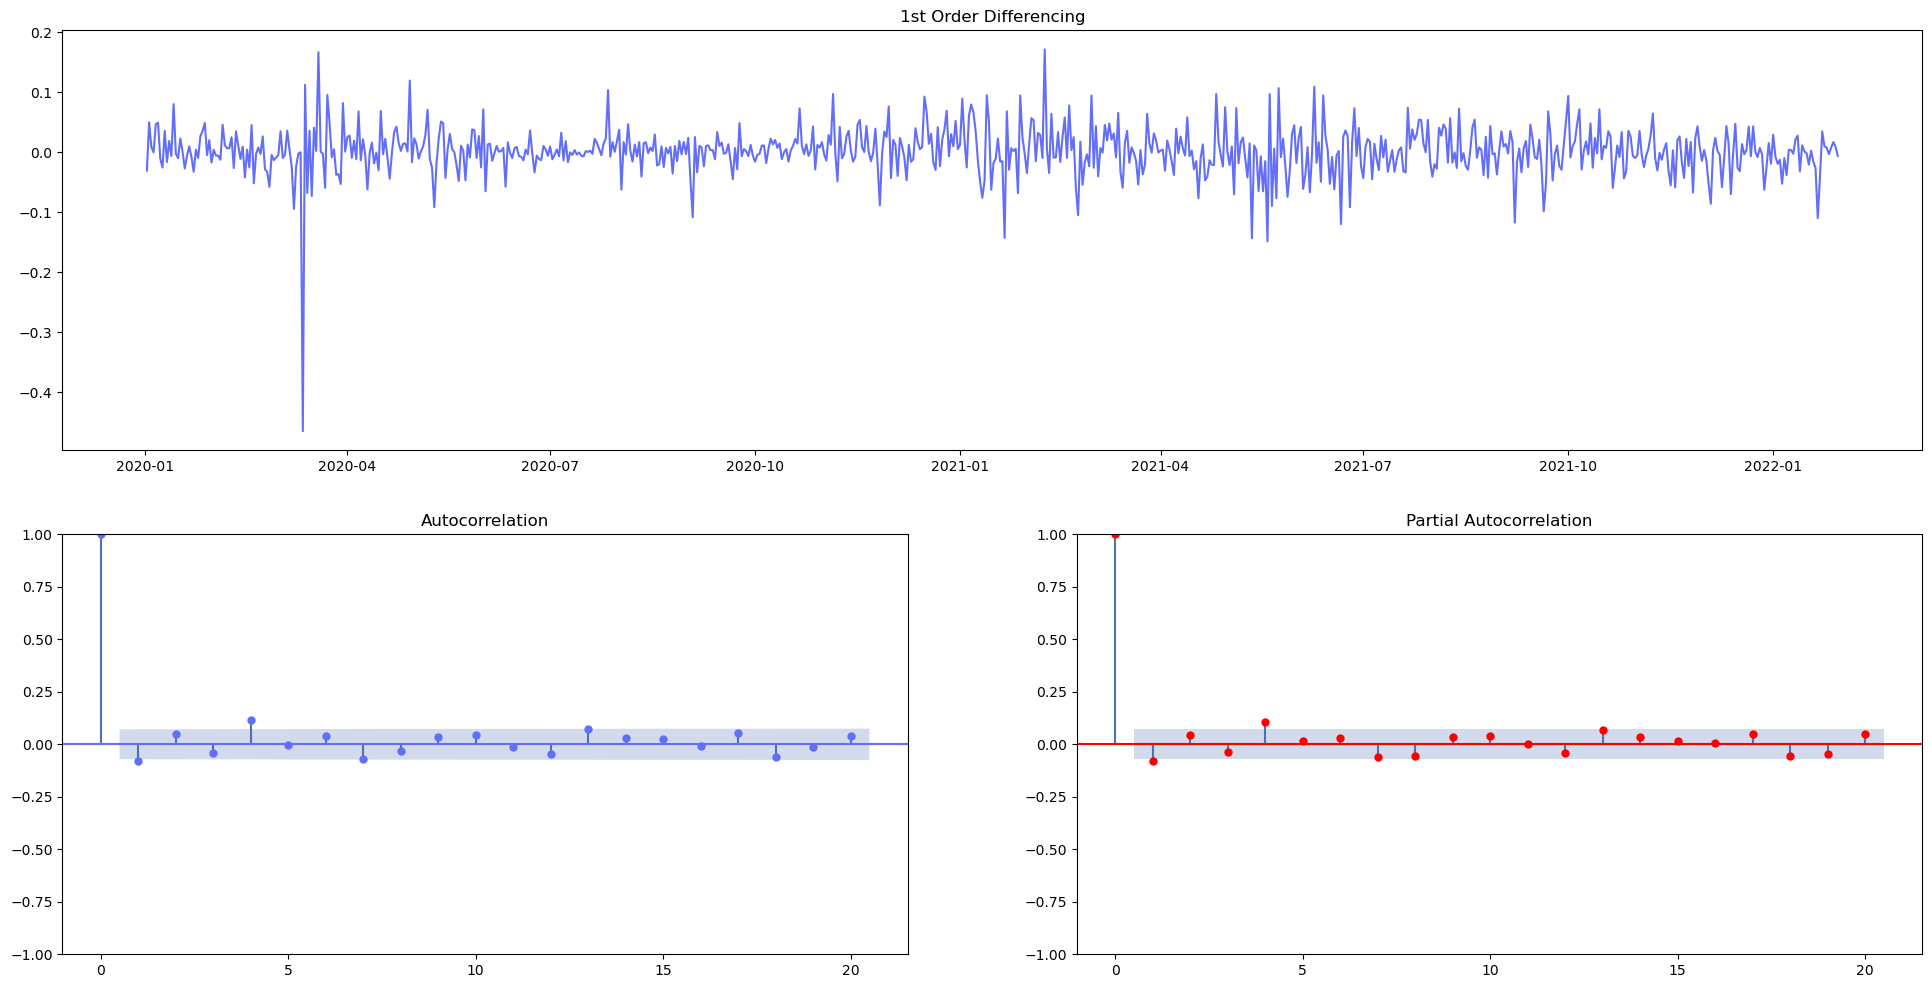

In [70]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#figure setup
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('1st Order Differencing')
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

#plots
ax1.plot(y_diff, color="#636EFA")
plot_acf(y_diff, lags=20, ax=ax2, color="#636EFA");
plot_pacf(y_diff, lags=20, ax=ax3, color='r', method='ywm')
plt.show()

<span style="color:grey; font-size:1.2em">We use the <b>PACF</b> plot to calculate the value of <b>p</b><br>We use the <b>ACF</b> graph to calculate the value of <b>q</b>
</span>

#### Training the ARIMA

In [71]:
log_df

Date
2020-01-01 00:00:00+00:00     8.881861
2020-01-02 00:00:00+00:00     8.851588
2020-01-03 00:00:00+00:00     8.901759
2020-01-04 00:00:00+00:00     8.910674
2020-01-05 00:00:00+00:00     8.910763
                               ...    
2022-01-26 00:00:00+00:00    10.514668
2022-01-27 00:00:00+00:00    10.522402
2022-01-28 00:00:00+00:00    10.539650
2022-01-29 00:00:00+00:00    10.548971
2022-01-30 00:00:00+00:00    10.543171
Name: Close, Length: 761, dtype: float64

In [72]:
#from statsmodels.tsa.arima_model import ARIMA #statsmodels 0.11
from statsmodels.tsa.arima.model import ARIMA #statsmodels >=0.12

y= log_df #just to be precise

arima = ARIMA(y, order=(1,1,1))
#arima = arima.fit(disp = 0 )
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  761
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1359.603
Date:                Mon, 26 Dec 2022   AIC                          -2713.206
Time:                        10:15:57   BIC                          -2699.306
Sample:                    01-01-2020   HQIC                         -2707.854
                         - 01-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7964      0.105     -7.607      0.000      -1.002      -0.591
ma.L1          0.7252      0.121      5.970      0.000       0.487       0.963
sigma2         0.0016    2.4e-05     68.231      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18526.98
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -2.01
Prob(H) (two-sided):                  0.01   Kurtosis:                        26.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
!pip install pmdarima
import pmdarima as pm
smodel = pm.auto_arima(y,
                       start_p =0, max_p = 5,
                       start_d = 0, max_d = 5,
                       start_q = 0, max_q = 5,
                       seasonal = False,
                       trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2706.898, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2709.688, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2709.294, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2706.705, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2709.171, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2713.627, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2711.423, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2711.651, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2708.597, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2710.137, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2713.206, Time=0.42 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.111 seconds


#### Divide our series

In [74]:
train_size=0.7 #70% of data

index = round(train_size*log_df.shape[0])

y_train = log_df.iloc[:index] #first 70% rows for training set
y_test = log_df.iloc[index:] #last 30% rows for test set
n_train=len(y_train)

#results from auto arima
best_order = smodel.order # best (p,d,q)

In [75]:
print("The size of the training data is: ",y_train.shape[0])
print("The Size of the testing data is: ",y_test.shape[0])

The size of the training data is:  533
The Size of the testing data is:  228


In [76]:
y_train

Date
2020-01-01 00:00:00+00:00     8.881861
2020-01-02 00:00:00+00:00     8.851588
2020-01-03 00:00:00+00:00     8.901759
2020-01-04 00:00:00+00:00     8.910674
2020-01-05 00:00:00+00:00     8.910763
                               ...    
2021-06-12 00:00:00+00:00    10.478766
2021-06-13 00:00:00+00:00    10.573823
2021-06-14 00:00:00+00:00    10.602082
2021-06-15 00:00:00+00:00    10.606740
2021-06-16 00:00:00+00:00    10.554433
Name: Close, Length: 533, dtype: float64

<span style="color:grey; font-size:1.2em">Let's start "training" our model</span>

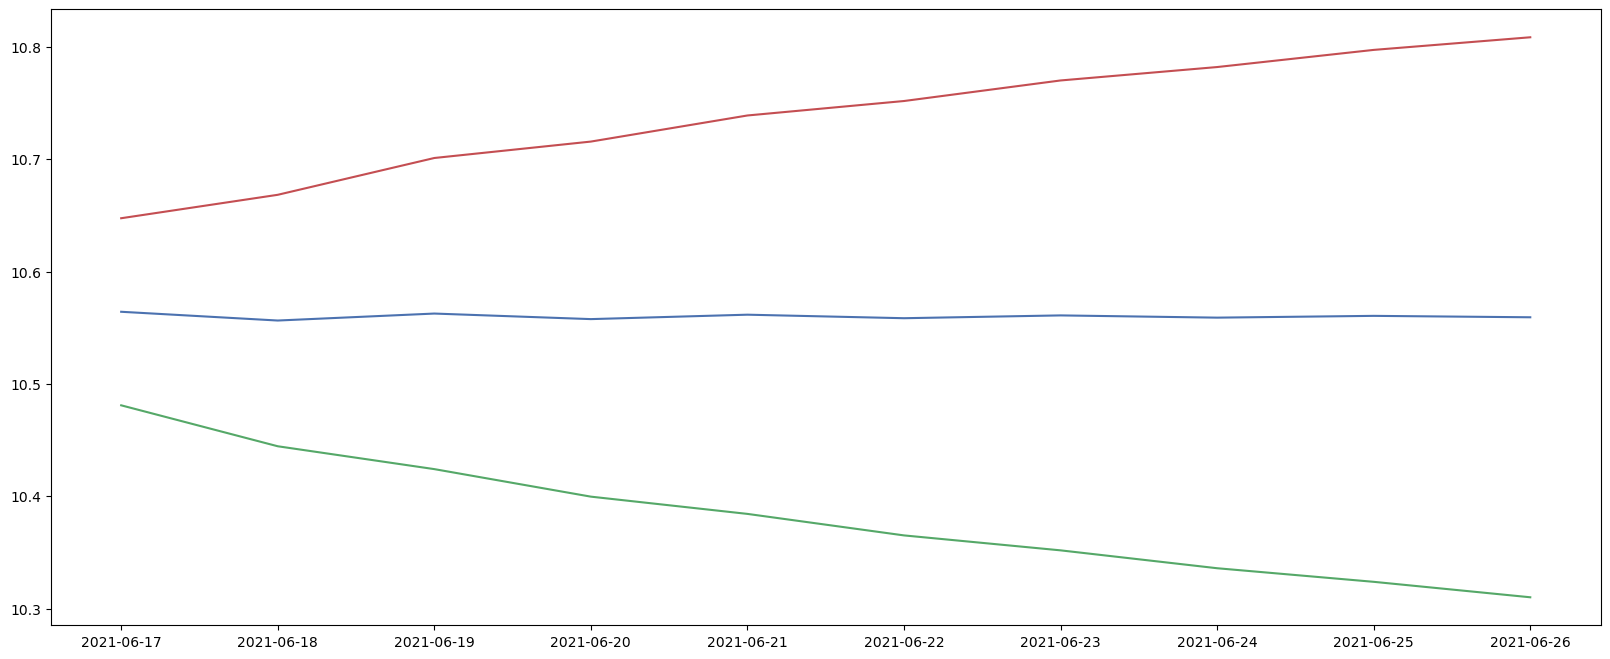

In [77]:
plt.figure(figsize=(20,8))
plt.plot(ARIMA(y_train,order=best_order).fit().get_forecast(10).predicted_mean)
plt.plot(ARIMA(y_train,order=best_order).fit().get_forecast(10).conf_int())

In [78]:
arima_df = ARIMA(y_train,order=best_order).fit().get_forecast(10).conf_int()
arima_df['pred'] = ARIMA(y_train,order=best_order).fit().get_forecast(10).predicted_mean
arima_df

lower Close  upper Close       pred
2021-06-17 00:00:00+00:00    10.480950    10.647490  10.564220
2021-06-18 00:00:00+00:00    10.444506    10.668346  10.556426
2021-06-19 00:00:00+00:00    10.424159    10.701107  10.562633
2021-06-20 00:00:00+00:00    10.399655    10.715725  10.557690
2021-06-21 00:00:00+00:00    10.384295    10.738958  10.561626
2021-06-22 00:00:00+00:00    10.365152    10.751831  10.558491
2021-06-23 00:00:00+00:00    10.351847    10.770130  10.560988
2021-06-24 00:00:00+00:00    10.335931    10.782068  10.559000
2021-06-25 00:00:00+00:00    10.323836    10.797331  10.560583
2021-06-26 00:00:00+00:00    10.310077    10.808568  10.559322

In [79]:
def walk_forward_validation(n_train, test):
    # create dataframe to store the outcome
    result = pd.DataFrame(columns=['forecast', 'lower_interval', 'upper_interval'])
    # predict one point at a time
    for i in range(len(test)):
        # define train set
        train_ = log_df.iloc[:n_train+i].copy()
        # train the model
        arima = ARIMA(endog = train_, order=best_order).fit(method_kwargs={"warn_convergence": False})
        # get the forecast
        results = arima.get_forecast(1, alpha=0.05)
        # central
        result.loc[i, 'forecast'] = results.predicted_mean[0]
        # lower interval
        result.loc[i, 'lower_interval'] = results.conf_int().iloc[0, 0]
        # upper interval
        result.loc[i, 'upper_interval'] = results.conf_int().iloc[0, 1]
    # join with test dataframe
    result.index=test.index
    result = result.apply(pd.to_numeric)
    test = test.to_frame()
    print(type(test))
    return test.join(result)

result = walk_forward_validation(n_train, y_test)

<class 'pandas.core.frame.DataFrame'>


In [80]:
result

Close   forecast  lower_interval  \
Date                                                              
2021-06-17 00:00:00+00:00  10.546748  10.564220       10.480950   
2021-06-18 00:00:00+00:00  10.485347  10.540787       10.457583   
2021-06-19 00:00:00+00:00  10.480547  10.495883       10.412625   
2021-06-20 00:00:00+00:00  10.482858  10.473713       10.390523   
2021-06-21 00:00:00+00:00  10.363336  10.487376       10.404259   
...                              ...        ...             ...   
2022-01-26 00:00:00+00:00  10.514668  10.517151       10.437652   
2022-01-27 00:00:00+00:00  10.522402  10.515068       10.435618   
2022-01-28 00:00:00+00:00  10.539650  10.521560       10.442165   
2022-01-29 00:00:00+00:00  10.548971  10.539030       10.459675   
2022-01-30 00:00:00+00:00  10.543171  10.548757       10.469450   

                           upper_interval  
Date                                       
2021-06-17 00:00:00+00:00       10.647490  
2021-06-18 00:00:00+00:00       10.623991  
2021-06-19 00:00:00+00:00       10.579141  
2021-06-20 00:00:00+00:00       10.556903  
2021-06-21 00:00:00+00:00       10.570492  
...                                   ...  
2022-01-26 00:00:00+00:00       10.596649  
2022-01-27 00:00:00+00:00       10.594518  
2022-01-28 00:00:00+00:00       10.600955  
2022-01-29 00:00:00+00:00       10.618385  
2022-01-30 00:00:00+00:00       10.628064  

[228 rows x 4 columns]

<div id="validation">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Validation
        </h3>
</div>

In [81]:
# baseline = tomorrows prediction is todays price
result['base'] = result['Close'].shift()
result['base'].iloc[0] = y_train.to_frame().Close[-1]
result.apply(lambda x: np.exp(x).astype('float16')).tail(5) #exp for visualization only

Close  forecast  lower_interval  upper_interval  \
Date                                                                           
2022-01-26 00:00:00+00:00  36864.0   36928.0         34112.0         40000.0   
2022-01-27 00:00:00+00:00  37152.0   36864.0         34048.0         39904.0   
2022-01-28 00:00:00+00:00  37792.0   37120.0         34272.0         40160.0   
2022-01-29 00:00:00+00:00  38144.0   37760.0         34880.0         40864.0   
2022-01-30 00:00:00+00:00  37920.0   38144.0         35232.0         41280.0   

                              base  
Date                                
2022-01-26 00:00:00+00:00  36960.0  
2022-01-27 00:00:00+00:00  36864.0  
2022-01-28 00:00:00+00:00  37152.0  
2022-01-29 00:00:00+00:00  37792.0  
2022-01-30 00:00:00+00:00  38144.0

In [82]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    # shift train predictions for plotting
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    names = cycle(['Training data','Actual close price','Forecast close price'])


    plotdf = pd.DataFrame({'date': log_df.index,
                           'training': train,
                           'actual': test,
                           'Forecast': fc_series})

    fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['training'],plotdf['actual'],
                                              plotdf['Forecast']],
                  labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='Prediction with ARIMA (1, 1, 1)',
                      plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

In [83]:
plot_forecast(result.forecast, y_train, y_test, np.array(result.upper_interval), np.array(result.lower_interval))

<span style="color:grey; font-size:1.2em">Let's evaluate using performance metrics.</span>

In [84]:
# define a function to get MAPE using y_pred, y_true
def get_mape(y_true, y_pred):
    '''takes y_true, y_pred (pandas series)
    returns mean absolute percentage error'''
    mape = 100*((y_true - y_pred)/y_true).abs().mean()
    return round(mape, 2)

# define a function to get MASE using y_pred, y_true
def get_mase(y_true, y_pred, y_train):
    '''takes y_true, y_pred (pandas series)
    returns mean absolute scaled error'''
    mae_test = (y_true - y_pred).abs().mean()
    y_t = y_train
    y_t_1 = y_train.shift(-1)
    mae_train = (y_t - y_t_1).abs().mean()
    return round(mae_test/mae_train, 2)

In [85]:
# MAPE and MASE 
print('mape model:', get_mape(result.Close, result.forecast))
print('mape baseline:', get_mape(result.Close, result.base))
print('')
print('mase model:', get_mase(result.Close, result.forecast, y_train.to_frame().Close))
print('mase baseline', get_mase(result.Close, result.base, y_train.to_frame().Close))

mape model: 0.25
mape baseline: 0.24

mase model: 0.97
mase baseline 0.95


#### Recompose the original time series

In [86]:
forecast_recons = np.exp(result.forecast)
train_recons = np.exp(y_train)
test_recons = np.exp(y_test)
lower_recons = np.array(np.exp(result.lower_interval))
upper_recons = np.array(np.exp(result.upper_interval))

# plt 
plot_forecast(forecast_recons, train_recons, test_recons, upper_recons, lower_recons)

<span style="color:grey; font-size:1.2em">Again we achieved a better score with time series forecasting using <b>ARIMA</b></span>

<center id="Bot">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Trading 🤖 Bot
        </h2>
</center>`

<div id="simulation">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Creating a Simulation
        </h3>
</div>



In [87]:
from tqdm import tqdm

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

#in practice do not supress these warnings, they carry important information about the status of your model
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)



prices = data.history(start='2021-04-01', end='2021-10-01').Close
returns = prices.pct_change().dropna()

<span style="color:grey; font-size:1.2em">Simulate the buying and selling of Bitcoin stocks using one of the models we will specify</span>

In [88]:
def run_simulation(returns, prices, amt, order, thresh, verbose=False, plot=True):
    if type(order) == float:
        thresh = None
        
    curr_holding = False
    events_list = []
    init_amt = amt

    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        
        if type(order) == tuple:
            try:
                #fit model
                model = ARIMA(curr_data, order=order).fit()
                #get forecast
                pred = model.forecast()[0]
            
            except Exception as e:
                print(e)
                pred = thresh - 1



        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
        ((type(order) == float and np.random.random() < order) 
         or (type(order) == tuple and pred > thresh)
         or (order == 'last' and curr_data[-1] > 0)):
            
            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)
                
    if verbose:
        print('Total Amount: $%s'%round(amt,2))
        
    #graph
    if plot:
    
        plt.figure(figsize=(18,8))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims), 
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%(tickerSymbol, thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()
    
    return amt

<div id="testing">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Test Approaches
        </h3>
</div>




<span style="color:grey; font-size:1.2em">Just for fun, we'll start with a <b>random purchase</b> approach.</span>

100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 4913.11it/s]


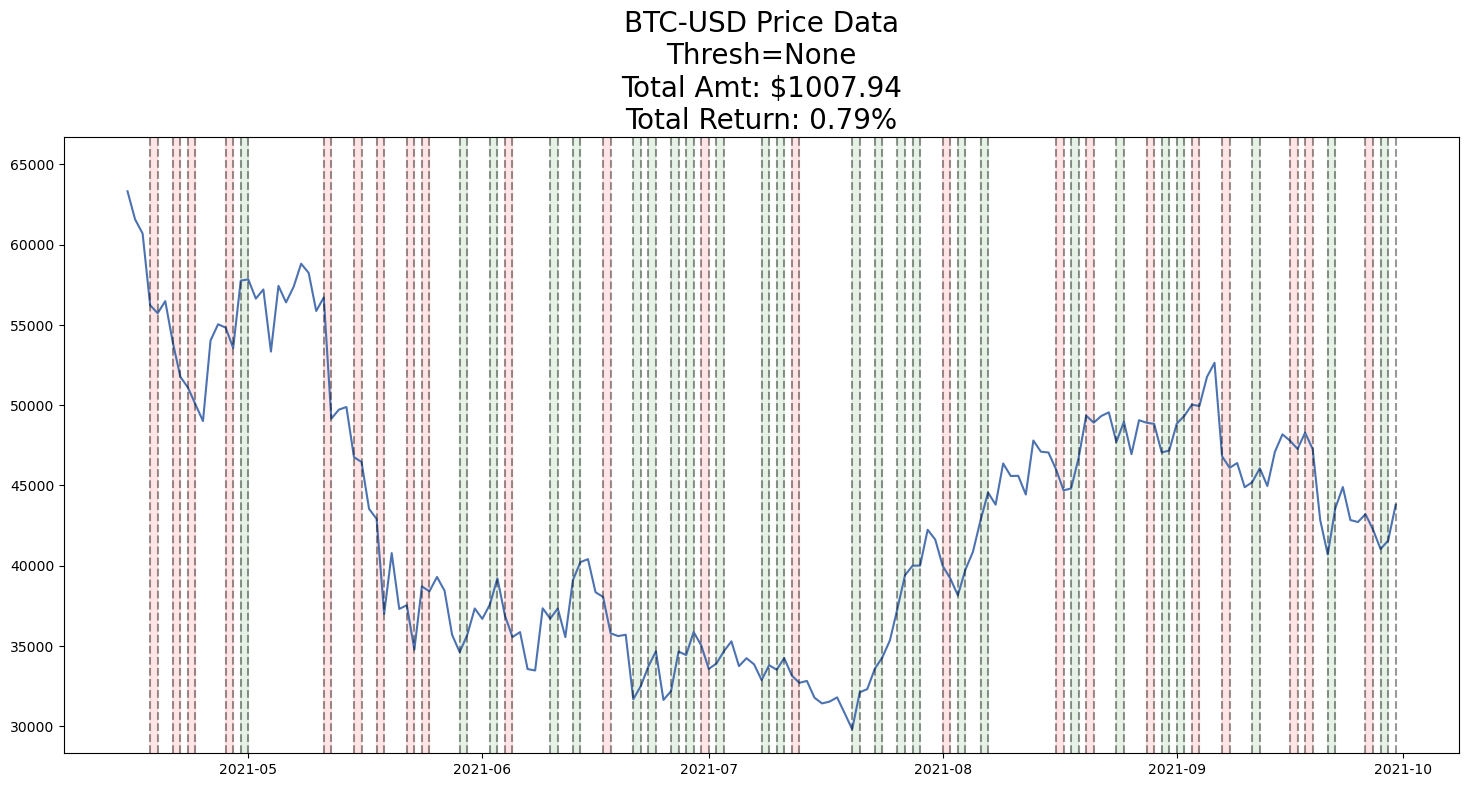

1007.942235034155

In [89]:
run_simulation(returns, prices, 1000, 0.5, None, verbose=False)


<span style="color:grey; font-size:1.2em">Repeat the random purchase simulation <b>1000 times</b> to ensure that we will always be <b>below the average</b> of the amount of money <b>1000$</b> with which we have started.</span>

In [90]:
final_amts = [run_simulation(returns, prices, 1000, 0.5, None, verbose=False, plot=False) for _ in range(1000)]

100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 7585.94it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 10167.72it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 8495.41it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 9656.61it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 5220.00it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 11561.95it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 9402.01it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 19830.67it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 5987.94it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 13705.81it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 15723.73it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 13131.38it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 11266.54it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 9262.60it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 7131.51it/s]


Text(0.5, 1.0, 'Avg: $942.0\nSD: $270.27')

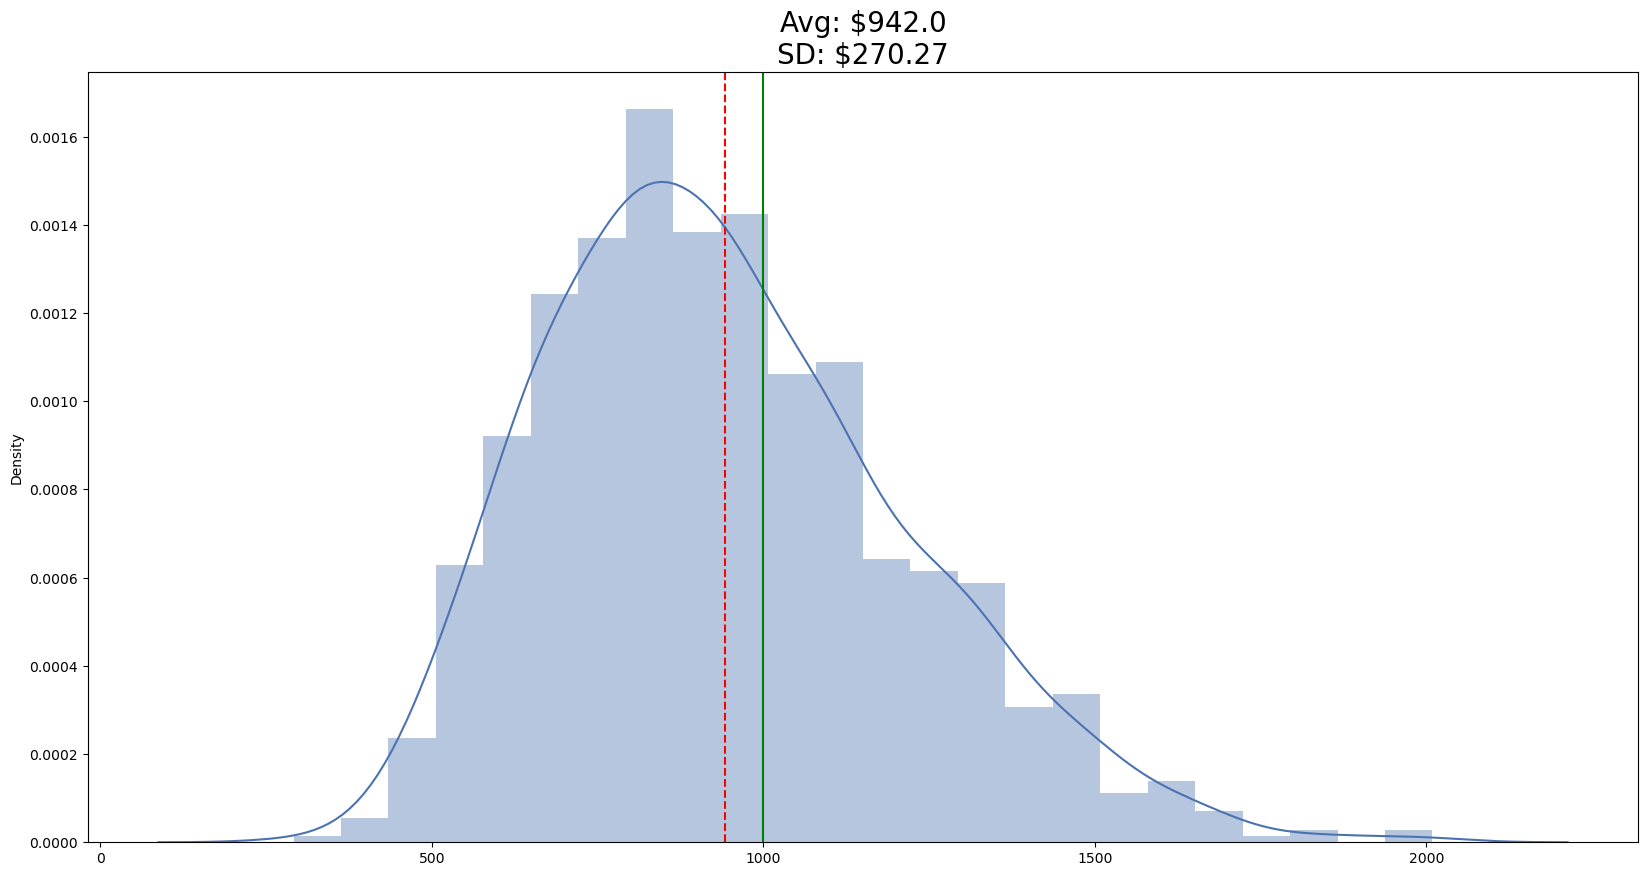

In [91]:
plt.figure(figsize=(20,10))
sb.distplot(final_amts)
plt.axvline(np.mean(final_amts), color='r', linestyle='--')
plt.axvline(1000, color='g')
plt.title('Avg: $%s\nSD: $%s'%(round(np.mean(final_amts),2), round(np.std(final_amts),2)), fontsize=20)


<h4 style="color:red; font-size:1.2em">So we will lose about 5% of our money.</h4>

#### Technique: If the last feedback was positive, buy

100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 13423.05it/s]


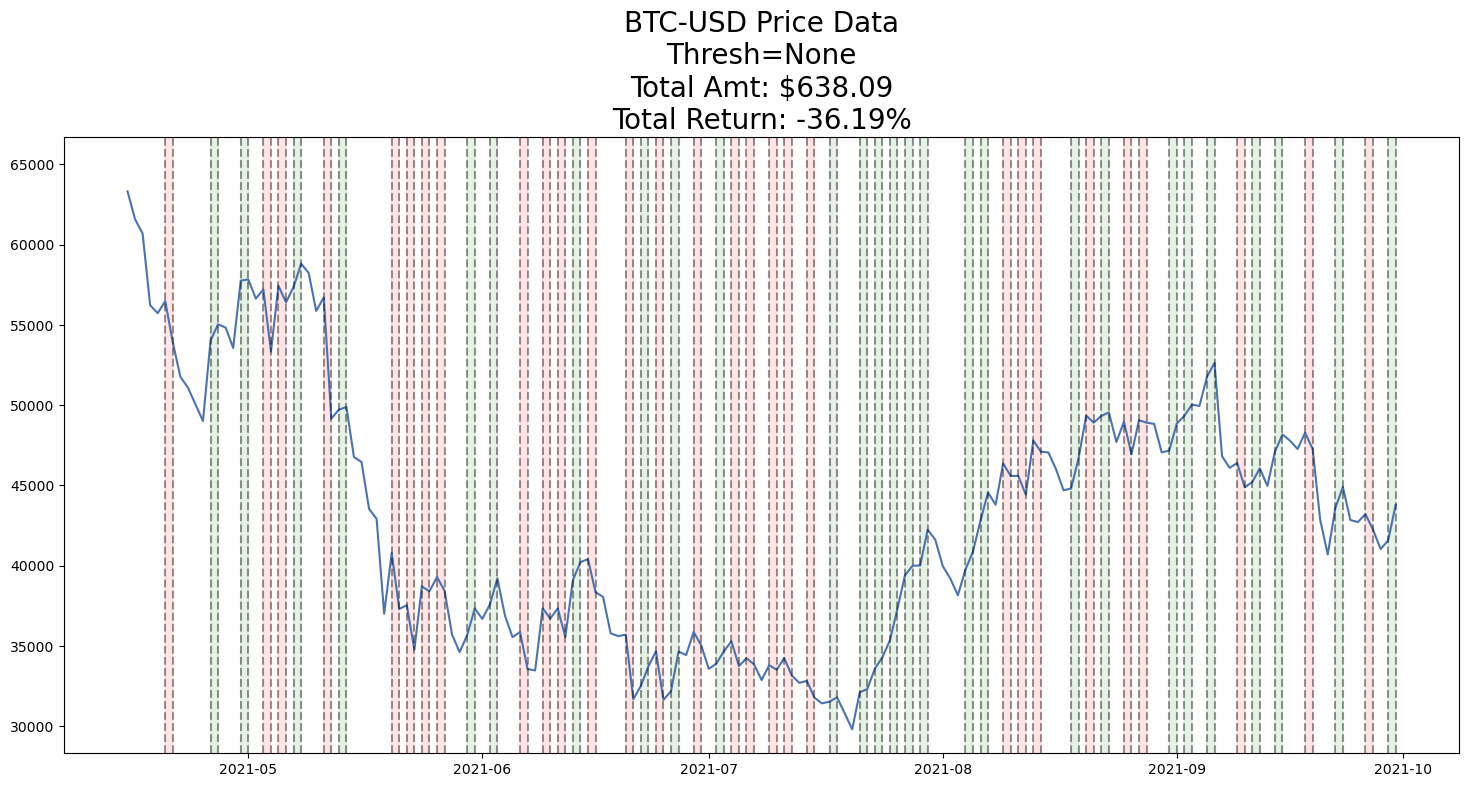

638.0927594035334

In [92]:
run_simulation(returns, prices, 1000, 'last', None, verbose=False)


<span style="color:grey; font-size:1.2em">The technique of buying the last return if it is positive does not work well for bitcoin.</span>

#### Technique: AR(1) Model


<span style="color:grey; font-size:1.2em">every day we predict what the next day's bitcoin value will be if this predicted outcome is above a threshold we specify => the bot will do it but otherwise => no trade will be executed</span>

100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [00:28<00:00,  5.93it/s]


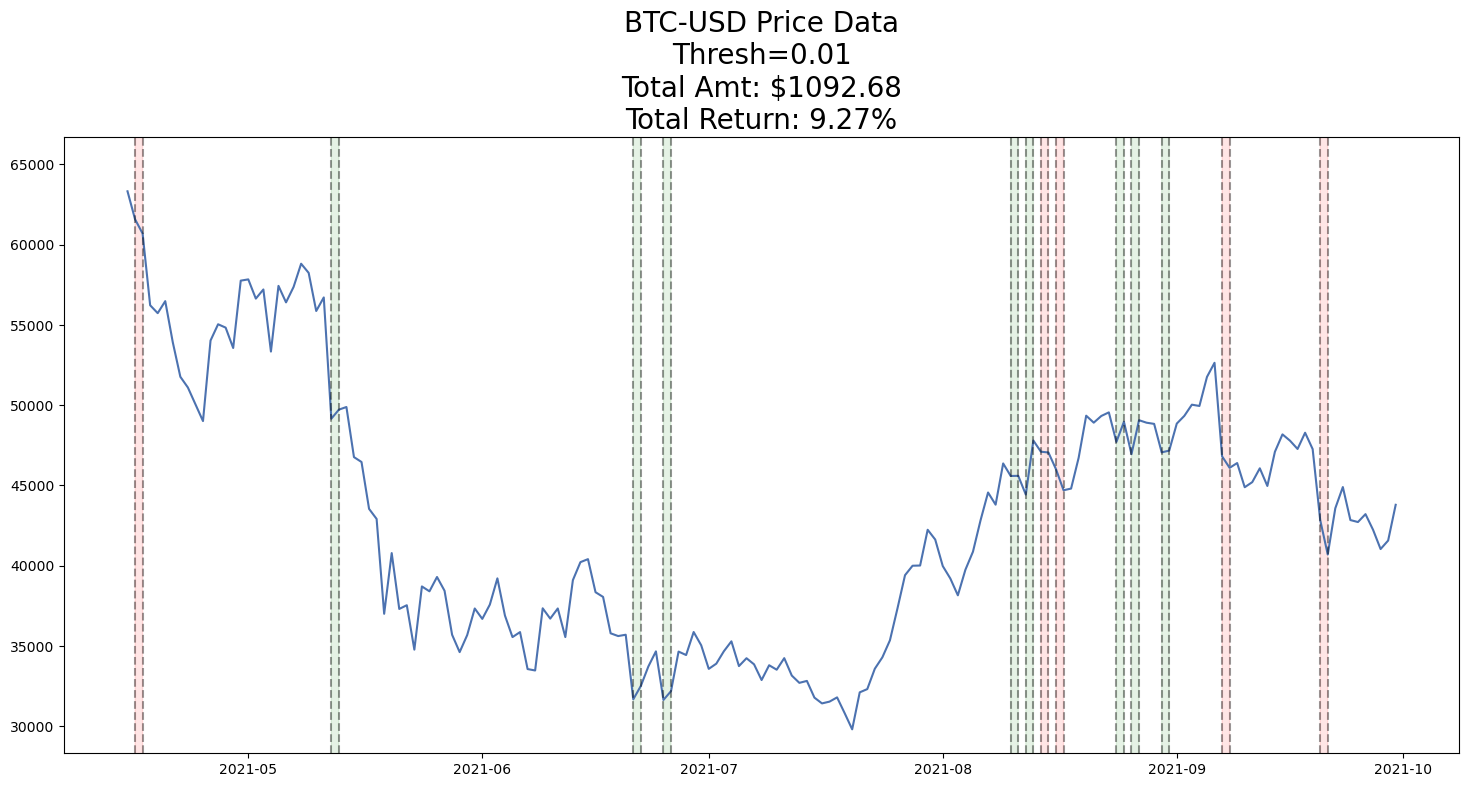

1092.6838673540194

In [93]:
run_simulation(returns, prices, 1000, (1,1,1), 0.01, verbose=False)

100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [00:09<00:00, 17.35it/s]


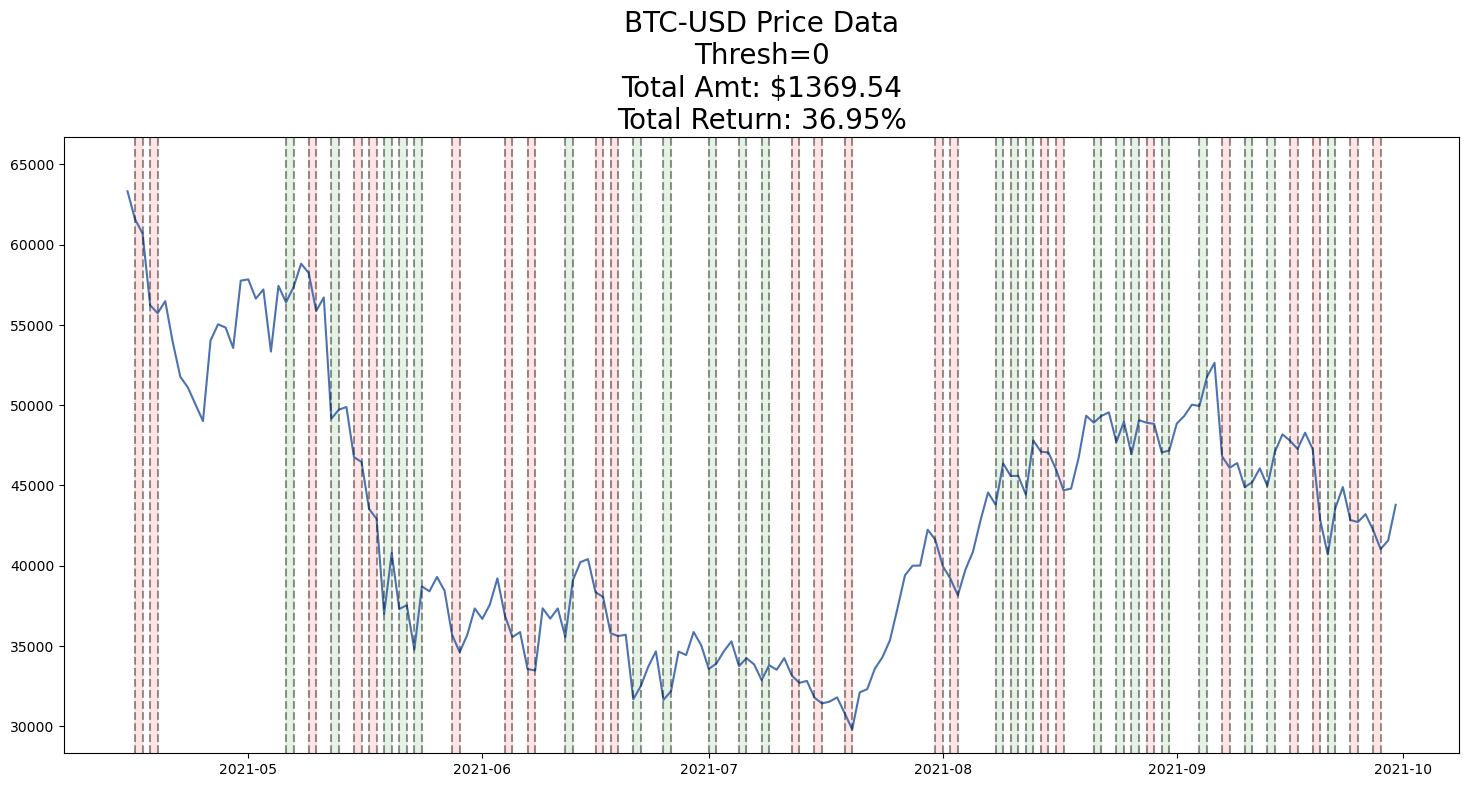

100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [00:09<00:00, 16.96it/s]


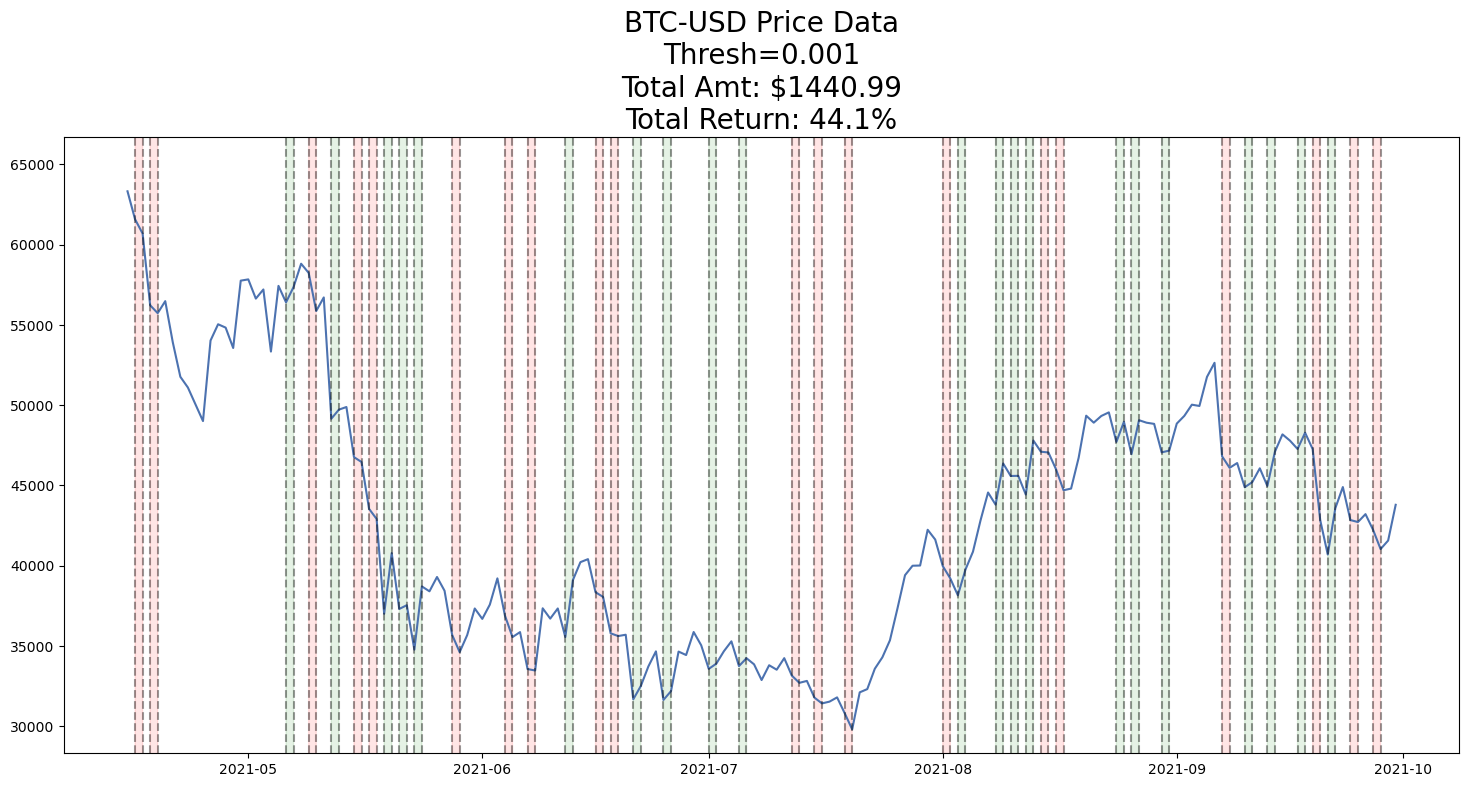

100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [00:11<00:00, 14.75it/s]


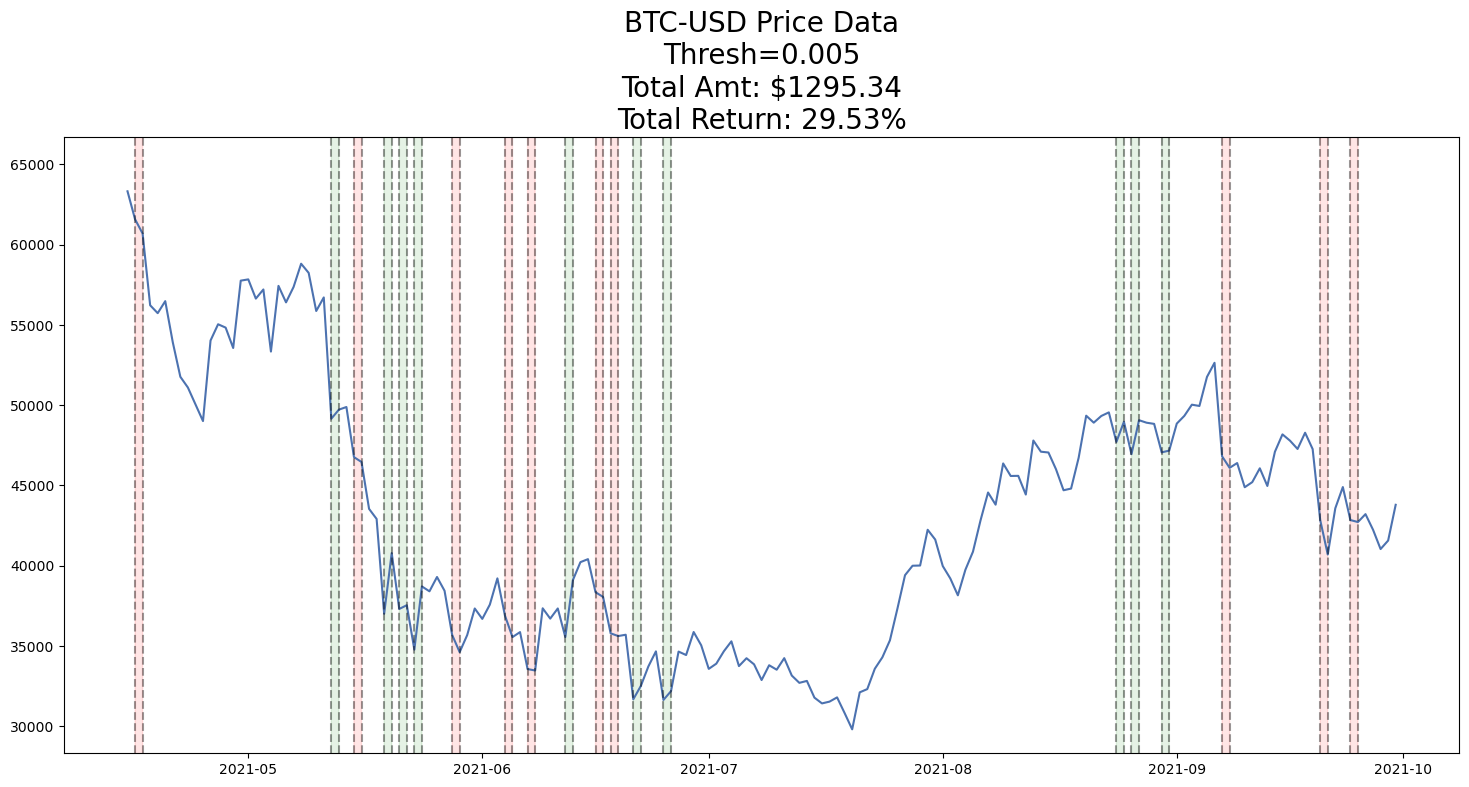

In [94]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 1000, (1,0,0), thresh, verbose=False)


<span style="color:grey; font-size:1.2em">The <b>ARIMA(1,0,0)</b> with a threshold of 0.001 achieves <b>44%</b> return which is an <b>exceptional result</b> 🤑.</span>

### Technique: AR(5) Model


<span style="color:grey; font-size:1.2em">Now let's try an <b>ARIMA(5,0,5)</b> </span>

  2%|█▉                                                                                | 4/168 [00:00<00:28,  5.73it/s]

Schur decomposition solver error.
Schur decomposition solver error.


  4%|██▉                                                                               | 6/168 [00:01<00:31,  5.17it/s]

Schur decomposition solver error.
Schur decomposition solver error.


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [01:11<00:00,  2.36it/s]


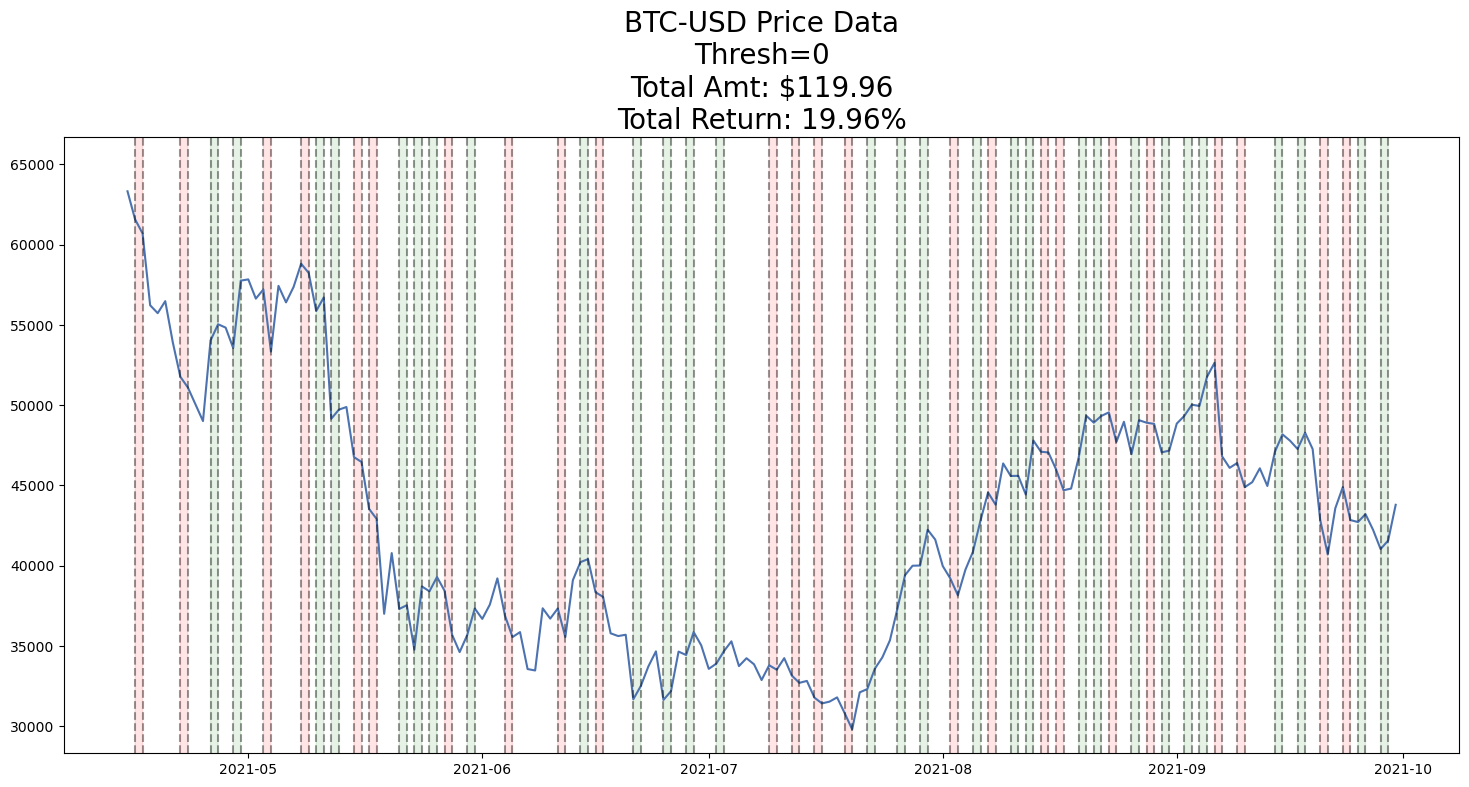

  2%|█▍                                                                                | 3/168 [00:00<00:24,  6.70it/s]

Schur decomposition solver error.


  3%|██▍                                                                               | 5/168 [00:00<00:29,  5.56it/s]

Schur decomposition solver error.
Schur decomposition solver error.


  4%|██▉                                                                               | 6/168 [00:01<00:30,  5.35it/s]

Schur decomposition solver error.


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [01:10<00:00,  2.38it/s]


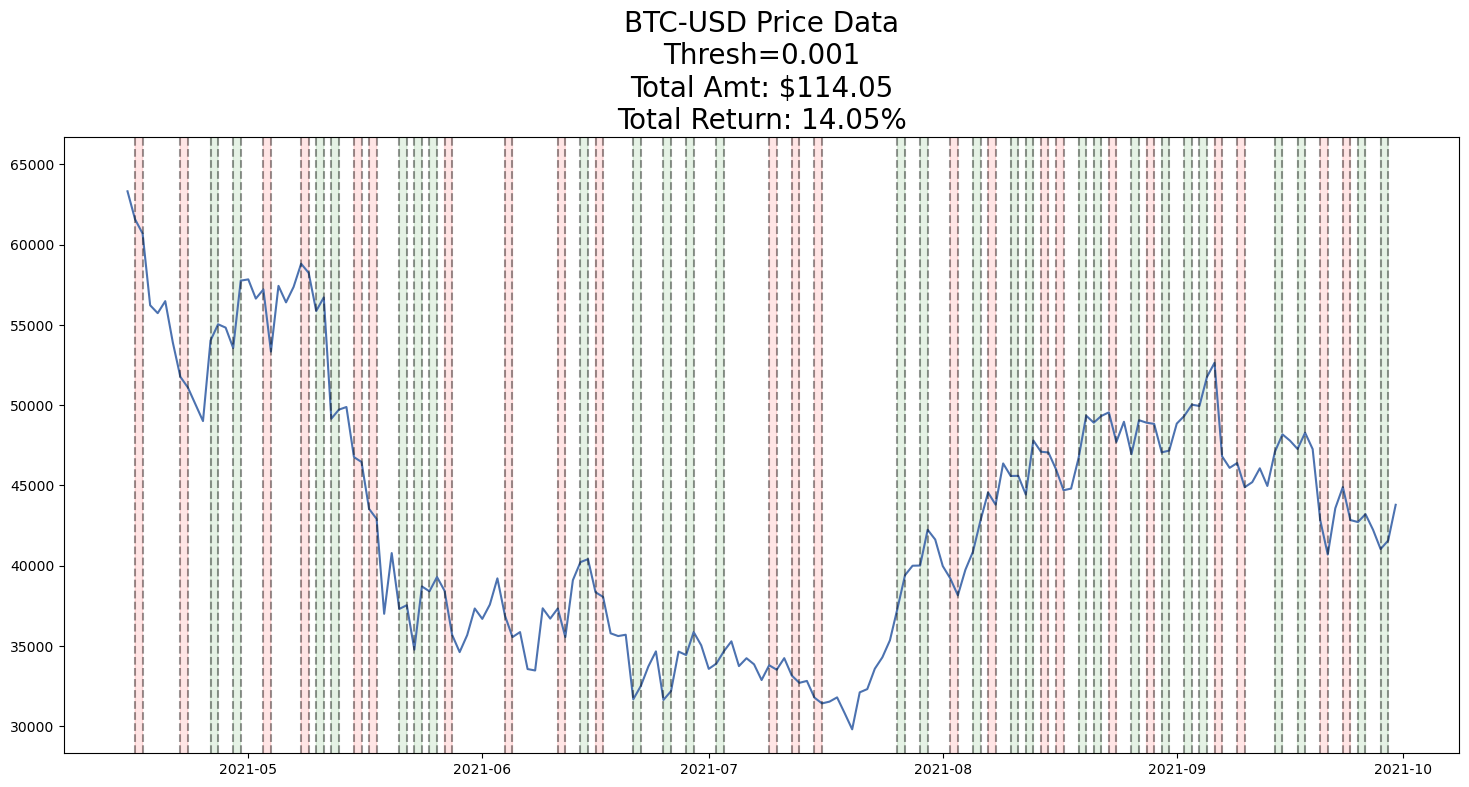

  2%|█▉                                                                                | 4/168 [00:00<00:28,  5.74it/s]

Schur decomposition solver error.
Schur decomposition solver error.


  4%|██▉                                                                               | 6/168 [00:01<00:29,  5.50it/s]

Schur decomposition solver error.
Schur decomposition solver error.


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [01:24<00:00,  1.99it/s]


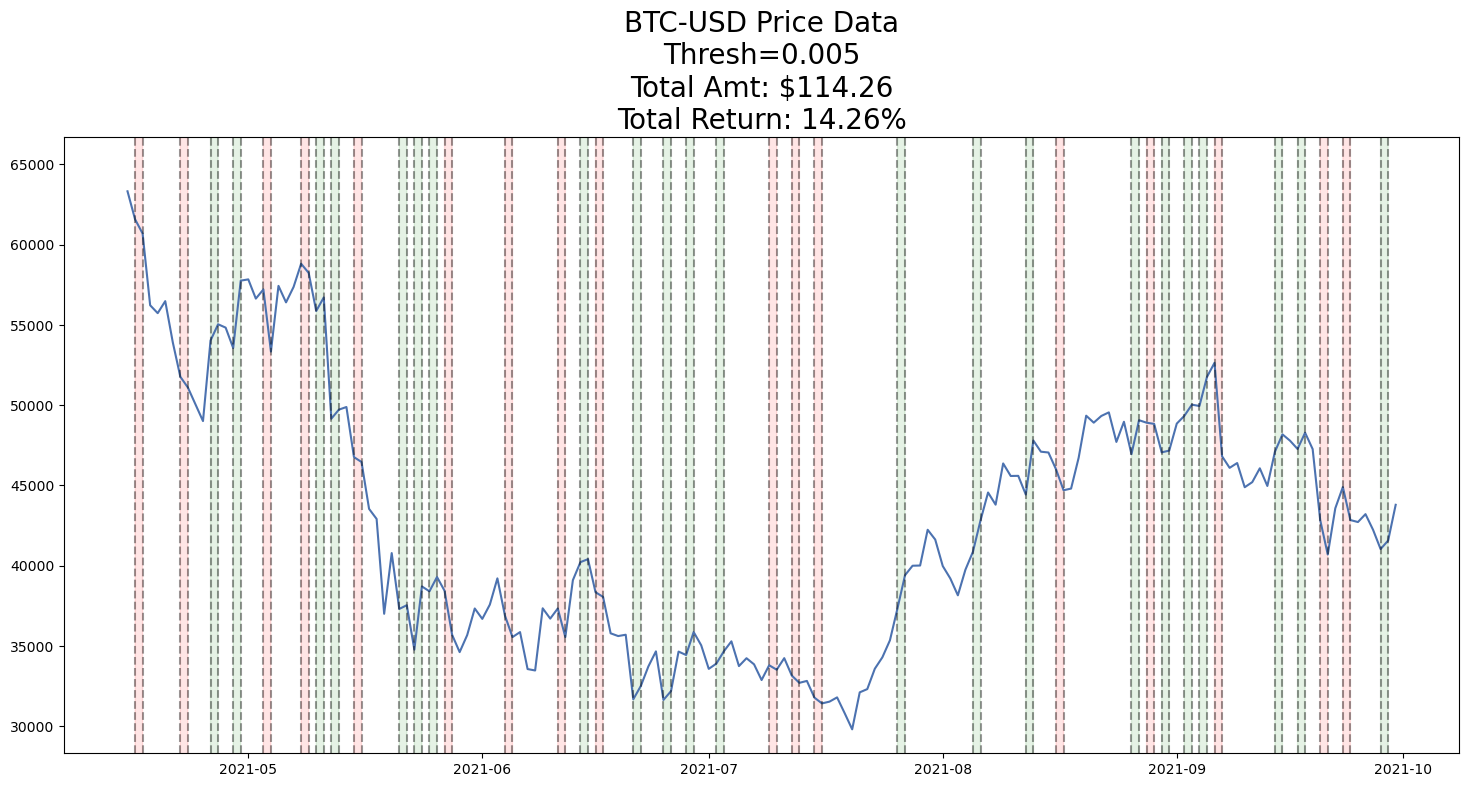

In [95]:
for thresh in [0, 0.001, 0.005]:
    run_simulation(returns, prices, 100, (5,0,5), thresh, verbose=False)

<span style="color:grey; font-size:1.2em">We failed to achieve a better result. It is possible that we have started to enter the phase of "Overfitting"</span>

<div id="binance">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
             ⮞  Trading in Binance
        </h3>
</div>



<span style="color:grey; font-size:1.2em"><b>Binance</b> is a platform that allows you to store, buy, resell, and exchange <b>cryptocurrencies</b> against other cryptocurrencies but also against fiat currencies such as the Euro or the Dollar .</span>

In [96]:
!pip install python-binance
from binance.client import Client
from binance.exceptions import BinanceAPIException

<span style="color:grey; font-size:1.2em">The API Key is a unique identifier that authenticates requests associated with your project for usage and billing purposes. You must have at least one API key associated with your project</span>

In [97]:
# Enter your API key here
api_key="API_KEY_HERE"
api_secret="API_SECRET_HERE"

In [98]:
client = Client(api_key,api_secret)

In [99]:
pd.DataFrame(client.get_historical_klines('BTCUSDT','1m','30 m ago UTC')).tail()

0               1               2               3   \
25  1672030140000  16875.57000000  16876.59000000  16874.33000000   
26  1672030200000  16874.88000000  16875.86000000  16873.97000000   
27  1672030260000  16874.95000000  16877.78000000  16874.82000000   
28  1672030320000  16876.05000000  16876.20000000  16873.59000000   
29  1672030380000  16873.96000000  16874.78000000  16873.63000000   

                4            5              6                7     8   \
25  16874.71000000  53.94439000  1672030199999  910331.35605640  2015   
26  16874.89000000  40.04505000  1672030259999  675759.96160850  1822   
27  16876.05000000  53.27206000  1672030319999  899039.40808370  2178   
28  16874.11000000  44.77096000  1672030379999  755495.44291690  2064   
29  16874.44000000  12.10175000  1672030439999  204208.67339330   551   

             9                10 11  
25  27.27014000  460198.57904720  0  
26  19.76845000  333595.21566170  0  
27  25.97674000  438395.54353420  0  
28  19.37968000  327031.36162930  0  
29   7.68957000  129757.38339160  0

In [100]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol,interval, lookback+' m ago UTC'))
    frame = frame.iloc[:,:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame


In [101]:
visual_test=getminutedata('BTCUSDT','1m','30')

In [102]:
fig = px.line(visual_test.Open)

fig.update_layout(title='BTC/USD Price',
                   xaxis_title='Time',
                   yaxis_title='Price',
                   plot_bgcolor='white')

fig.show()

#### The Strategy of our Trading Bot


<span style="color:grey; font-size:1.2em">Every day we predict what the value of <b>Bitcoin</b> will be the next day. <br>&emsp;&emsp;If this predicted result is above a threshold we specify => <b>The bot will buy 💰</b> <br> &emsp;&emsp;Otherwise => <b>No trade will be executed😴</b></span>

In [103]:
def strategy(symbol, qty, entried=False):
    df = getminutedata(symbol, '1m', '30')
    cumulret = (df.Open.pct_change() + 1).cumprod() - 1
    if not entried:
        if cumulret[-1] < -0.002:
            order = client.create_order(symbol=symbol, side='BUY', type='MARKET', quantity=qty)
            print(order)
            enteried = True
        else:
            print ("No transaction was executed")
    if entried:
        while True:
            df = getminutedata(symbol, '1m', '30')
            sincebuy = df.loc[df.index > pd.tp_datetime(order['transactTime'], unit='ms')]
            if len(sincebuy) > 0:
                sincebuyret = (sincebuy.Open.pct_change() + 1).cumprod() - 1
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] \
                    < -0.0015:
                    order = client.create_order(symbol=symbol,
                            side='SELL', type='MARKET', quantity=qty)
                    print(order)
                    break


<span style="color:grey; font-size:1.2em">Since we have no balance on my accounts, we can't test the bot in practice 😟<span>

In [104]:
try:
    strategy('BTCUSDT',0.001)
except BinanceAPIException:
    print("the account has an insufficient balance for the requested action.")
except Exception as e:
    print(e)

No transaction was executed


<center id="Conclusion">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Conclusion 📌
        </h2>
</center>

<div style="color:grey; font-size:1.2em">The work we carried out consisted in exploring the life cycle of a Data Science project in general and Deep Learning and time series in particular. We learned well how to collect the data, analyze and transform the data, in the Pre-processing part we divided the data and adapt our data, and lately the construction of the models by trying different approaches: Basic models, Neural networks and Forecast with time series. Finally, we carried out simulations to evaluate our models as well as we connceted a Beninace Trading service to carry out the trades.
<br>
<br>
<span style="color:black; font-size:1.2em; background-color:#FFFFA6">This project allowed us to acquire new techniques, several libraries and packages, as well as a clearer view of the world of trading and cryptocurrency.</span>
</div>